In [49]:
import pandas as pd
path = '../dataset/'
prefix = "Fecom Inc"

customers_df = pd.read_csv(f'{path}/{prefix} Customer List.csv', sep=';')
geolocations_df = pd.read_csv(f'{path}/{prefix} Geolocations.csv', sep=';')
order_items_df = pd.read_csv(f'{path}/{prefix} Order Items.csv', sep=';')
order_payments_df = pd.read_csv(f'{path}/{prefix} Order Payments.csv', sep=';')
orders_df = pd.read_csv(f'{path}/{prefix} Orders.csv', sep=';')
products_df = pd.read_csv(f'{path}/{prefix} Products.csv', sep=';')
sellers_df = pd.read_csv(f'{path}/{prefix} Sellers List.csv', sep=';')
reviews_df = pd.read_csv(f'{path}/Fecom_Inc_Order_Reviews_No_Emojis.csv', sep=';')



C:\Users\Familia\AppData\Local\Temp\ipykernel_12804\639127878.py:6: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  geolocations_df = pd.read_csv(f'{path}/{prefix} Geolocations.csv', sep=';')


Informacion Vendedores

In [50]:
orders_df['Order_Purchase_Timestamp'] = pd.to_datetime(orders_df['Order_Purchase_Timestamp'])
orders_df['Order_Delivered_Customer_Date'] = pd.to_datetime(orders_df['Order_Delivered_Customer_Date'])
orders_df['Order_Estimated_Delivery_Date'] = pd.to_datetime(orders_df['Order_Estimated_Delivery_Date'])

In [51]:
orders_df['Atraso'] = (orders_df['Order_Delivered_Customer_Date'] - orders_df['Order_Estimated_Delivery_Date']).dt.days
orders_df['Tiempo total'] = (orders_df['Order_Delivered_Customer_Date'] - orders_df['Order_Purchase_Timestamp']).dt.days

In [52]:
items_orders_df = pd.merge(order_items_df, orders_df[['Order_ID', 'Atraso', 'Tiempo total']], on='Order_ID')

In [53]:
reviews_orders_df = pd.merge(items_orders_df , reviews_df[['Order_ID', 'Review_Score']], on='Order_ID')

In [54]:
items_full = pd.merge(reviews_orders_df, products_df, on ='Product_ID')

In [55]:
items_full

,Order_ID,Order_Item_ID,Product_ID,Seller_ID,Shipping_Limit_Date,Price,Freight_Value,Atraso,Tiempo total,Review_Score,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2023-09-19 09:45,58.90,13.29,-9.0,7.0,5,Cool_Stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2023-05-03 11:05,239.90,19.93,-3.0,16.0,4,Pet_Shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2024-01-18 14:48,199.00,17.87,-14.0,7.0,5,Furniture_Decor,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2024-08-15 10:10,12.99,12.79,-6.0,6.0,4,Perfumery,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2023-02-13 13:57,199.90,18.14,-16.0,25.0,5,Garden_Tools,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112366,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2024-05-02 04:11,299.99,43.41,-8.0,17.0,5,Housewares,10150.0,89.0,15.0,40.0
112367,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2024-07-20 04:31,350.00,36.53,-9.0,9.0,5,Computers_Accessories,8950.0,45.0,26.0,38.0
112368,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2023-10-30 17:14,99.90,16.95,-13.0,4.0,5,Sports_Leisure,967.0,21.0,24.0,19.0
112369,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2023-08-21 00:04,55.99,8.72,-9.0,1.0,5,Computers_Accessories,100.0,20.0,20.0,20.0


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
df = items_full
df['review'] = df['Review_Score'].apply(lambda x: 1 if x >= 4 else 0)

features = [ 'Product_Weight_Gr', 'Product_Length_Cm', 'Product_Height_Cm', 'Product_Width_Cm',
    'Atraso', 'Tiempo total']

df = df[features + ['review']].dropna()

X = df[features]
y = df['review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)




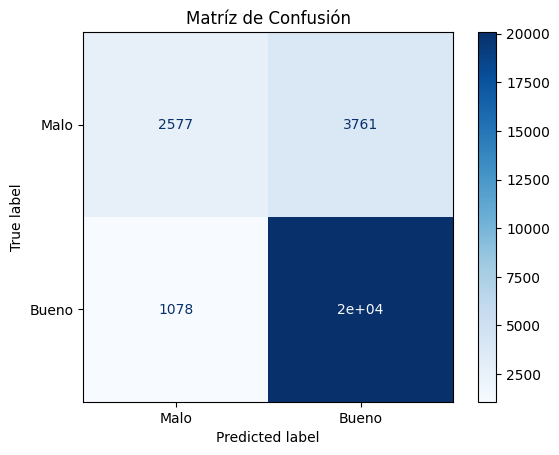

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malo', 'Bueno'])
disp.plot(cmap='Blues')
plt.title('Matríz de Confusión')
plt.show()

In [34]:
df = reviews_orders_df.groupby('Seller_ID')
promerdio_review = df['Review_Score'].mean()
total_orders = df['Order_ID'].count()
Atraso_totales = df['Atraso'].apply(lambda x: (x > 0).sum())
review_malas = df['Review_Score'].apply(lambda x: (x <= 2).sum())
review_buenas = df['Review_Score'].apply(lambda x: (x >= 4).sum())

seller_stats = pd.DataFrame({
    'promerdio_review': promerdio_review,
    'total_orders': total_orders,
    'Atraso_totales': Atraso_totales,
    'catidad_review_malas': review_malas,
    'catidad_review_buenas': review_buenas
}).reset_index()

In [35]:
seller_stats = pd.merge(seller_stats, sellers_df[['Seller_ID', 'Seller_Name']], on='Seller_ID', how='right' )

In [36]:
seller_stats

,Seller_ID,promerdio_review,total_orders,Atraso_totales,catidad_review_malas,catidad_review_buenas,Seller_Name
0,d1b65fc7debc3361ea86b5f14c68d2e2,4.560976,41.0,1.0,2.0,38.0,NeuroLabsX
1,51a04a8a6bdcb23deccc82b0b80742cf,1.000000,1.0,1.0,1.0,0.0,SwiftLabs
2,e49c26c3edfa46d227d5121a6b6e4d37,4.416667,36.0,0.0,3.0,30.0,EcoFutures
3,1b938a7ec6ac5061a66a3766e0e75f90,4.242424,33.0,0.0,4.0,29.0,HyperHub
4,a7a9b880c49781da66651ccf4ba9ac38,3.750000,4.0,0.0,0.0,3.0,EliteAI
...,...,...,...,...,...,...,...
3090,443d880f15cbd3572885e1d44bf2c478,2.000000,2.0,0.0,2.0,0.0,CrimsonPulse
3091,4a3ccda38b2129705f3fb522db62ca31,3.734177,79.0,5.0,19.0,51.0,EchoGlade
3092,6c77cd583b36a13aacccf2b3ee23e233,5.000000,1.0,0.0,0.0,1.0,FrostHaven
3093,82bd0703a4aefd6b599e5bfdaed378fb,3.600000,25.0,1.0,7.0,16.0,LunarRidge


In [37]:
full_data = pd.merge(items_full, seller_stats, on = 'Seller_ID')